In [6]:
# Required libraries
import dowhy
from dowhy import CausalModel
import dowhy.datasets

# Avoiding unnecessary log messges and warnings
import logging
logging.getLogger("dowhy").setLevel(logging.WARNING)
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Load some sample data
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=100,
    treatment_is_binary=True)

In [7]:
data

{'df':      Z0        Z1        W0        W1        W2        W3        W4     v0  \
 0   0.0  0.505542  0.217316  0.299010  1.208574  1.115281 -1.364205   True   
 1   0.0  0.138231  1.843124 -1.307583 -0.653889 -0.113443 -1.464817  False   
 2   0.0  0.869520  1.995874 -0.045592 -0.942159  1.302622  0.343924   True   
 3   1.0  0.326392  2.275729 -0.492905 -0.180006  0.676023  0.634337   True   
 4   0.0  0.681836  0.438684  0.600571 -1.205339  0.623016 -1.629765   True   
 ..  ...       ...       ...       ...       ...       ...       ...    ...   
 95  0.0  0.620632  1.367755  0.750635  0.704734 -0.311877 -0.616734   True   
 96  0.0  0.629967  2.073615 -0.991050 -1.492310  3.002410 -2.129988   True   
 97  0.0  0.796768 -1.404038  0.216216  1.035444  1.572052 -0.756662   True   
 98  0.0  0.872441  0.076129 -0.778478 -1.895693  2.319213  1.444354   True   
 99  0.0  0.773080 -0.157460 -0.582761  0.069128  0.052137  1.037515   True   
 
             y  
 0   13.053370  
 1   -8.81

In [12]:
# I. Create a causal model from the data and domain knowledge.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    common_causes=data["common_causes_names"],
    intrumental_variables=data["instrument_names"])


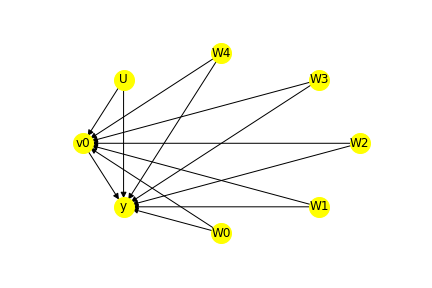

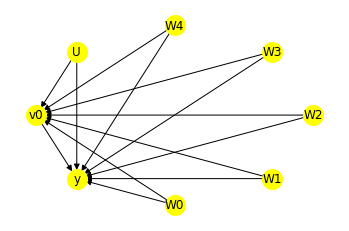

In [13]:
model.view_model(layout="dot")
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

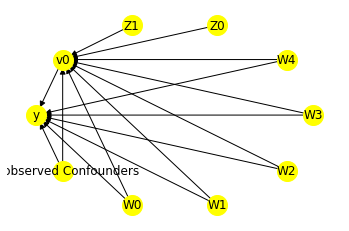

In [16]:
# I. Create a causal model from the data and given graph.
model = CausalModel(
    data=data["df"],
    treatment=data["treatment_name"][0],
    outcome=data["outcome_name"][0],
    graph=data["gml_graph"])
model.view_model(layout="dot")

In [17]:
# II. Identify causal effect and return target estimands
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W4,W1,W3,W0,W2))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W1,W3,W0,W2,U) = P(y|v0,W4,W1,W3,W0,W2)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)



In [18]:
propensity_strat_estimate = model.estimate_effect(identified_estimand, method_name= "backdoor.dowhy.propensity_score_stratification")
print(propensity_strat_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W4,W1,W3,W0,W2))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W1,W3,W0,W2,U) = P(y|v0,W4,W1,W3,W0,W2)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

## Realized estimand
b: y~v0+W4+W1+W3+W0+W2
Target units: ate

## Estimate
Mean value: nan



In [19]:
data

{'df':      Z0        Z1        W0        W1        W2        W3        W4     v0  \
 0   0.0  0.505542  0.217316  0.299010  1.208574  1.115281 -1.364205   True   
 1   0.0  0.138231  1.843124 -1.307583 -0.653889 -0.113443 -1.464817  False   
 2   0.0  0.869520  1.995874 -0.045592 -0.942159  1.302622  0.343924   True   
 3   1.0  0.326392  2.275729 -0.492905 -0.180006  0.676023  0.634337   True   
 4   0.0  0.681836  0.438684  0.600571 -1.205339  0.623016 -1.629765   True   
 ..  ...       ...       ...       ...       ...       ...       ...    ...   
 95  0.0  0.620632  1.367755  0.750635  0.704734 -0.311877 -0.616734   True   
 96  0.0  0.629967  2.073615 -0.991050 -1.492310  3.002410 -2.129988   True   
 97  0.0  0.796768 -1.404038  0.216216  1.035444  1.572052 -0.756662   True   
 98  0.0  0.872441  0.076129 -0.778478 -1.895693  2.319213  1.444354   True   
 99  0.0  0.773080 -0.157460 -0.582761  0.069128  0.052137  1.037515   True   
 
             y  propensity_score  strata  db

In [21]:
import econml
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor
dml_estimate = model.estimate_effect(identified_estimand,
                                    method_name="backdoor.econml.dml.DMLCateEstimator",
                                    method_params={
                                        'init_params': {'model_y':GradientBoostingRegressor(),
                                                        'model_t': GradientBoostingRegressor(),
                                                        'model_final':LassoCV(fit_intercept=False), },
                                        'fit_params': {}
                                     })
print(dml_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W4,W1,W3,W0,W2))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W1,W3,W0,W2,U) = P(y|v0,W4,W1,W3,W0,W2)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

## Realized estimand
b: y~v0+W4+W1+W3+W0+W2 | 
Target units: ate

## Estimate
Mean value: 10.02546419613836



In [23]:
data

{'df':      Z0        Z1        W0        W1        W2        W3        W4     v0  \
 0   0.0  0.505542  0.217316  0.299010  1.208574  1.115281 -1.364205   True   
 1   0.0  0.138231  1.843124 -1.307583 -0.653889 -0.113443 -1.464817  False   
 2   0.0  0.869520  1.995874 -0.045592 -0.942159  1.302622  0.343924   True   
 3   1.0  0.326392  2.275729 -0.492905 -0.180006  0.676023  0.634337   True   
 4   0.0  0.681836  0.438684  0.600571 -1.205339  0.623016 -1.629765   True   
 ..  ...       ...       ...       ...       ...       ...       ...    ...   
 95  0.0  0.620632  1.367755  0.750635  0.704734 -0.311877 -0.616734   True   
 96  0.0  0.629967  2.073615 -0.991050 -1.492310  3.002410 -2.129988   True   
 97  0.0  0.796768 -1.404038  0.216216  1.035444  1.572052 -0.756662   True   
 98  0.0  0.872441  0.076129 -0.778478 -1.895693  2.319213  1.444354   True   
 99  0.0  0.773080 -0.157460 -0.582761  0.069128  0.052137  1.037515   True   
 
             y  propensity_score  strata  db

In [42]:
data['df'][data['df']["v0"] == True]["y"].mean()

In [43]:
data['df'][data['df']["v0"] == False]["y"].mean()

In [44]:
data['df'][data['df']["v0"] == True]["y"].mean() - data['df'][data['df']["v0"] == False]["y"].mean()

In [46]:
data['df'].groupby('v0').mean()

,Z0,Z1,W0,W1,W2,W3,W4,y,propensity_score,strata,dbar,d_y,dbar_y
v0,,,,,,,,,,,,,
False,0.047619,0.349700,0.128299,-1.024379,-0.722945,0.764207,-1.350638,-6.548726,0.363874,7.904762,1,0.000000,-6.548726
True,0.227848,0.565625,1.095595,-0.067225,-0.361223,1.109057,-0.332427,10.458976,0.879794,29.860759,0,10.458976,0.000000


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import dowhy.datasets, dowhy.plotter

In [78]:
rvar = 1 if np.random.uniform() > 0.2 else 0
is_linear = False # A non-linear dataset. Change to True to see results for a linear dataset.
data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar,
                                      num_common_causes=2,
                                      is_linear=is_linear,
                                      sd_error=0.2)
df = data_dict['df']
print(df.head())
dowhy.plotter.plot_treatment_outcome(df[data_dict["treatment_name"]], df[data_dict["outcome_name"]],
                             df[data_dict["time_val"]])

TypeError: xy_dataset() got an unexpected keyword argument 'num_common_causes'

In [86]:
rvar = 1 if np.random.uniform() > 0.2 else 0
rvar

In [90]:
df = [data['df']]

model= CausalModel(
        data=df,
        treatment=data_dict["treatment_name"],
        outcome=data_dict["outcome_name"],
        common_causes=data_dict["common_causes_names"],
        instruments=data_dict["instrument_names"])
model.view_model(layout="dot")

NameError: name 'data_dict' is not defined

In [91]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=10000,
        treatment_is_binary=True,
        num_discrete_common_causes=1)
df = data["df"]
print(df.head())
print(data["dot_graph"])
print("\n")
print(data["gml_graph"])

         X0   Z0        Z1        W0        W1        W2        W3 W4    v0  \
0 -0.452802  1.0  0.321244 -0.518124  0.781896  0.998797 -1.505084  0  True   
1  0.606878  1.0  0.072907  0.965172  0.191212 -1.420737  0.127531  1  True   
2  0.758528  1.0  0.289023 -0.693638 -0.119376 -0.917055  1.183243  2  True   
3  2.053942  1.0  0.150597  0.341329  0.769786  0.392010 -0.180506  2  True   
4  0.459411  1.0  0.712850 -0.737050  1.014805 -0.224159 -1.803977  2  True   

           y  
0  11.085951  
1  12.632925  
2  13.280415  
3  25.480788  
4  14.239447  
digraph { U[label="Unobserved Confounders"]; U->y;v0->y; U->v0;W0-> v0; W1-> v0; W2-> v0; W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}


graph[directed 1node[ id "y" label "y"]node[ id "Unobserved Confounders" label "Unobserved Confounders"]edge[source "Unobserved Confounders" target "y"]node[ id "W0" label "W0"] node[ id "W1" label "W1"] node[ id "W2" label "W2"] node[ id "W3" label "W3"] node[

In [92]:
df

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,-0.452802,1.0,0.321244,-0.518124,0.781896,0.998797,-1.505084,0,True,11.085951
1,0.606878,1.0,0.072907,0.965172,0.191212,-1.420737,0.127531,1,True,12.632925
2,0.758528,1.0,0.289023,-0.693638,-0.119376,-0.917055,1.183243,2,True,13.280415
3,2.053942,1.0,0.150597,0.341329,0.769786,0.392010,-0.180506,2,True,25.480788
4,0.459411,1.0,0.712850,-0.737050,1.014805,-0.224159,-1.803977,2,True,14.239447
...,...,...,...,...,...,...,...,...,...,...
9995,2.289727,1.0,0.447460,1.700801,0.481586,0.470337,-1.522398,2,True,27.496537
9996,2.759361,1.0,0.587248,0.340056,2.329932,-0.705350,0.134512,2,True,28.967947
9997,0.853454,1.0,0.928796,-1.229750,0.851650,-1.237241,0.207038,3,True,15.107303
9998,1.597535,1.0,0.677631,0.877800,1.474048,-0.412776,-1.949652,0,True,17.866644


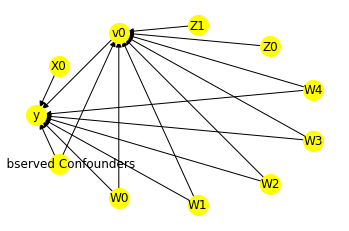

In [93]:
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )
model.view_model()

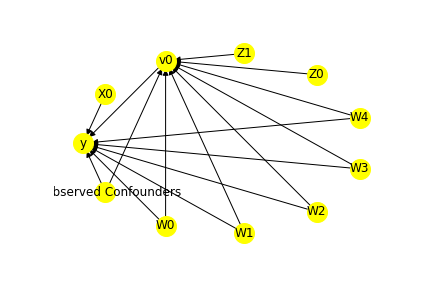

In [94]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [95]:
data_dict = dowhy.datasets.xy_dataset(10000, effect=rvar,
                                      num_common_causes=1,
                                      sd_error=0.2)
df = data_dict['df']

TypeError: xy_dataset() got an unexpected keyword argument 'num_common_causes'

In [96]:
import os, sys
sys.path.append(os.path.abspath("../../../"))

import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_treatments=1,
        num_samples=10000,
        treatment_is_binary=True,
        outcome_is_binary=False)
df = data["df"]
df


,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0.0,0.776946,0.412783,0.855992,-0.217146,-0.360303,0.916315,True,16.710491
1,0.0,0.200771,-0.357290,1.564446,-1.372314,-0.799441,1.092675,True,13.856881
2,1.0,0.341876,-1.295586,0.217454,0.803490,-0.769835,-0.326372,True,9.297437
3,0.0,0.239812,-2.059167,2.052142,1.242809,0.231883,0.098994,True,18.637654
4,0.0,0.663470,-1.245325,0.174201,-0.157838,2.157105,1.729900,True,14.344144
...,...,...,...,...,...,...,...,...,...
9995,0.0,0.118335,1.880827,2.015210,0.395854,0.575210,1.263033,True,28.913258
9996,0.0,0.737757,1.067897,1.308244,-0.191665,0.411182,1.484742,True,22.594551
9997,0.0,0.048586,-0.875648,-0.171347,-0.594120,-0.585692,2.504004,True,13.524207
9998,0.0,0.717517,-1.021708,0.496900,0.731201,-0.266738,-0.860531,True,9.188707


In [101]:
df[df["v0"] == False]

,Z0,Z1,W0,W1,W2,W3,W4,v0,y
16,0.0,0.461567,-2.925662,1.869931,-1.026985,-1.106086,-0.781795,False,-6.435774
32,0.0,0.561636,-0.867107,-0.047907,-1.526579,-1.218375,-0.193636,False,-9.261158
43,0.0,0.084259,-0.661401,-0.545311,-2.990435,-0.203436,-0.414868,False,-16.564070
65,0.0,0.363587,-0.178551,-1.598092,-0.463179,-2.074275,0.265722,False,-8.796330
105,0.0,0.828198,-1.885567,-1.748267,2.097522,-1.854142,0.553377,False,-2.734123
...,...,...,...,...,...,...,...,...,...
9929,0.0,0.544882,-0.843959,-0.191265,-0.434685,-1.551127,-0.468474,False,-6.835669
9949,0.0,0.262485,-1.615009,1.728550,-0.948991,-0.992107,-1.316804,False,-5.445230
9966,0.0,0.209256,-1.275705,2.195612,-0.939359,-1.305453,-0.869703,False,-1.278232
9972,0.0,0.018422,-0.902585,1.350919,-1.272273,-0.072274,-0.079819,False,-1.697356


In [102]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"],
        instruments=data["instrument_names"],
        logging_level = logging.INFO
        )

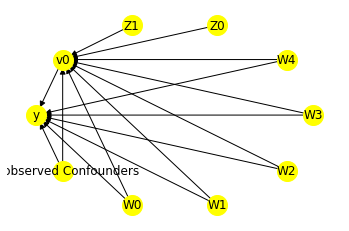

In [103]:
model.view_model()

In [105]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.125e+32
Date:                Tue, 29 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:26:53   Log-Likelihood:             3.0430e+05
No. Observations:               10000   AIC:                        -6.086e+05
Df Residuals:                    9993   BIC:                        -6.085e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.581e-14    6.5e-16     39.690      0.0

In [106]:
causal_estimate_strat = model.estimate_effect(identified_estimand,
                                              method_name="backdoor.propensity_score_stratification",
                                              target_units="att")
print(causal_estimate_strat)
print("Causal Estimate is " + str(causal_estimate_strat.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W4,W1,W3,W0,W2))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W4,W1,W3,W0,W2,U) = P(y|v0,W4,W1,W3,W0,W2)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

## Realized estimand
b: y~v0+W4+W1+W3+W0+W2
Target units: att

## Estimate
Mean value: 10.104832401984757

Causal Estimate is 10.104832401984757


In [107]:
import numpy as np
import pandas as pd
import patsy as ps
import matplotlib as plt

from statsmodels.sandbox.regression.gmm import IV2SLS
import os, sys
sys.path.append(os.path.abspath("../../../"))
from dowhy import CausalModel

In [109]:
n_points = 1000
education_abilty = 1
education_voucher = 0.5

income_abilty = 2
income_education = 4

In [121]:
def datashow(data):
    _ = plt.hist(data)
    plt.show()

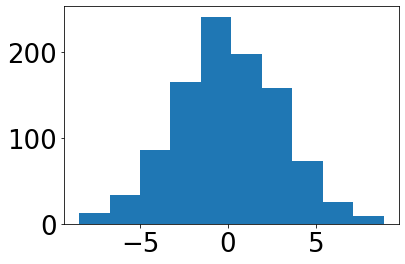

In [122]:
# confounder
ability = np.random.normal(0, 3, size = n_points)
datashow(ability)

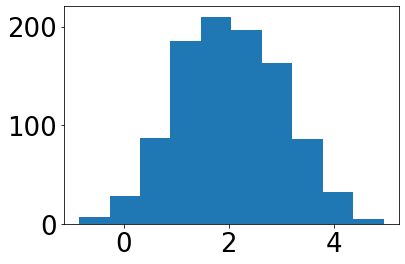

In [123]:
# instrument
voucher = np.random.normal(2, 1, size = n_points)
datashow(voucher)

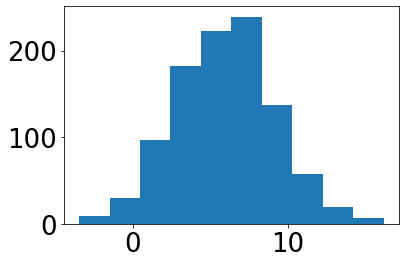

In [124]:
# treatment
education = np.random.normal(5, 1, size=n_points) + education_abilty * ability +\
            education_voucher * voucher
datashow(education)

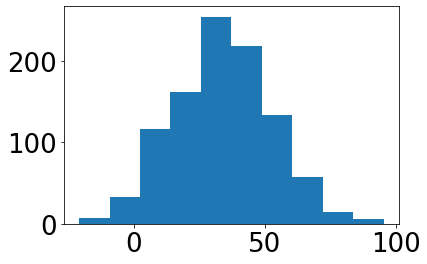

In [125]:
# outcome
income = np.random.normal(10, 3, size=n_points) +\
         income_abilty * ability + income_education * education

datashow(income)

In [126]:
# build dataset
data = np.stack([ability, education, income, voucher]).T
df = pd.DataFrame(data, columns = ['ability', 'education', 'income', 'voucher'])
df

,ability,education,income,voucher
0,2.351124,9.189434,54.440418,3.585728
1,3.169106,9.850848,55.691495,1.573458
2,-0.385966,6.958160,42.722293,2.666422
3,-1.306299,2.516076,25.654856,1.499078
4,-0.158980,4.600574,24.958513,0.720677
...,...,...,...,...
995,-1.185977,3.605507,19.488425,0.480770
996,1.653538,7.805506,38.938652,2.184780
997,2.049866,6.684712,37.644723,1.591440
998,-1.322189,5.530522,30.235162,3.875020


In [127]:
income_vec, endog = ps.dmatrices("income ~ education", data=df)
exog = ps.dmatrix("voucher", data=df)

m = IV2SLS(income_vec, endog, exog).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          IV2SLS Regression Results                           
==============================================================================
Dep. Variable:                 income   R-squared:                       0.912
Model:                         IV2SLS   Adj. R-squared:                  0.912
Method:                     Two Stage   F-statistic:                     272.4
                        Least Squares   Prob (F-statistic):           2.67e-54
Date:                Wed, 30 Dec 2020                                         
Time:                        10:07:08                                         
No. Observations:                1000                                         
Df Residuals:                     998                                         
Df Model:                           1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.6401      1.604      4.762      0.000       4.492      10.788
education      4.4004      0.267     16.506      0.000       3.877       4.924
==============================================================================
Omnibus:                        1.040   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.594   Jarque-Bera (JB):                1.027
Skew:                           0.078   Prob(JB):                        0.598
Kurtosis:                       2.992   Cond. No.                         14.7
==============================================================================
"""

In [129]:
endog

DesignMatrix with shape (1000, 2)
  Intercept  education
          1    9.18943
          1    9.85085
          1    6.95816
          1    2.51608
          1    4.60057
          1    7.09553
          1   10.27838
          1   11.01796
          1    2.74111
          1    9.09633
          1   16.18612
          1    7.28614
          1    3.88695
          1   -0.04133
          1   10.44513
          1    2.69735
          1    9.48627
          1    5.62580
          1    6.60907
          1    4.87362
          1    8.15777
          1    5.13912
          1    8.91951
          1    4.68126
          1    5.92446
          1    4.86217
          1    1.26271
          1    5.66509
          1    6.69894
          1    3.00360
  [970 rows omitted]
  Terms:
    'Intercept' (column 0)
    'education' (column 1)
  (to view full data, use np.asarray(this_obj))

In [130]:
model=CausalModel(
        data = df,
        treatment='education',
        outcome='income',
        common_causes=['ability'],
        instruments=['voucher']
        )

identified_estimand = model.identify_effect()

estimate = model.estimate_effect(identified_estimand,
        method_name="iv.instrumental_variable", test_significance=True
)
print(estimate)

Please respond with 'y' or 'n'
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate
### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                   
────────────(Expectation(income|ability))
d[education]                             
Estimand assumption 1, Unconfoundedness: If U→{education} and U→income then P(income|education,ability,U) = P(income|education,ability)
### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(income, [voucher])*Derivative([education], [voucher])**
(-1))
Estimand assumption 1, As-if-random: If U→→income then ¬(U →→{voucher})
Estimand assumption 2, Exclusion: If we remove {voucher}→{education}, then ¬({voucher}→income)

## Realized estimand
Realized estimand: Wald Estimator
Realized estimand type: nonparametric-ate
Estimand expression:
                                                                              
Expectation(Derivative(income, voucher))⋅Expectation(Deriv

In [132]:
import os, sys
import random
sys.path.append(os.path.abspath("../../../"))
import numpy as np
import pandas as pd

import dowhy
from dowhy import CausalModel
from IPython.display import Image, display

In [133]:
z=[i for i in range(10)]
random.shuffle(z)
df = pd.DataFrame(data = {'Z': z, 'X': range(0,10), 'Y': range(0,100,10)})
df

,Z,X,Y
0,1,0,0
1,4,1,10
2,6,2,20
3,9,3,30
4,3,4,40
5,2,5,50
6,0,6,60
7,8,7,70
8,5,8,80
9,7,9,90


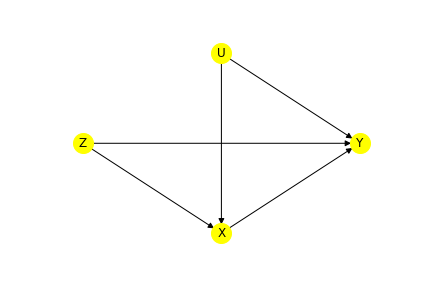

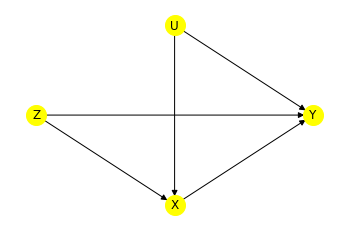

In [135]:
# With GML string
model=CausalModel(
        data = df,
        treatment='X',
        outcome='Y',
        graph="""graph[directed 1 node[id "Z" label "Z"]
                    node[id "X" label "X"]
                    node[id "Y" label "Y"]
                    edge[source "Z" target "X"]
                    edge[source "Z" target "Y"]
                    edge[source "X" target "Y"]]"""

        )
model.view_model()


display(Image(filename="causal_model.png"))

In [136]:
import dowhy.datasets
import dowhy.api

import numpy as np
import pandas as pd

from statsmodels.api import OLS

In [138]:
data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) # Adding noise to data. Without noise, the variance in Y|X, Z is zero, and mcmc fails.
#data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'

treatment= data["treatment_name"][0]
outcome = data["outcome_name"][0]
common_cause = data["common_causes_names"][0]
df

,W0,v0,y
0,1.847727,True,8.601318
1,-0.601728,True,4.671263
2,-0.192331,True,6.879883
3,1.186379,True,8.167697
4,0.678109,False,1.974826
...,...,...,...
995,1.938283,True,9.405439
996,0.368070,False,2.388162
997,0.220402,True,7.077518
998,-0.239130,False,1.556166


In [146]:
df[df["v0"] == True].mean()

W0    1.275392
v0    1.000000
y     7.362503
dtype: float64

In [147]:
df[df["v0"] == False].mean()

W0    0.372426
v0    0.000000
y     0.698193
dtype: float64

Please respond with 'y' or 'n'


<AxesSubplot:xlabel='v0'>

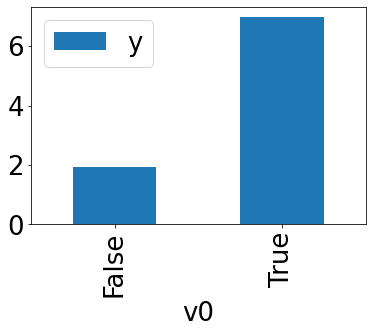

In [140]:
# data['df'] is just a regular pandas.DataFrame
df.causal.do(x=treatment,
                     variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'},
                     outcome=outcome,
                     common_causes=[common_cause]).groupby(treatment).mean().plot(y=outcome, kind='bar')

<AxesSubplot:xlabel='v0'>

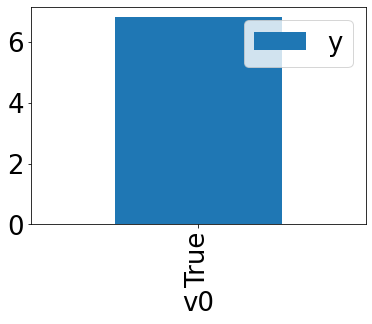

In [148]:
df.causal.do(x={treatment: 1},
              variable_types={treatment:'b', outcome: 'c', common_cause: 'c'},
              outcome=outcome,
              method='weighting',
              common_causes=[common_cause],
              proceed_when_unidentifiable=True).groupby(treatment).mean().plot(y=outcome, kind='bar')

In [149]:
cdf_1 = df.causal.do(x={treatment: 1},
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'},
              outcome=outcome,
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = df.causal.do(x={treatment: 0},
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'},
              outcome=outcome,
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)


ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


In [151]:
cdf_1["weight"].mean()

In [152]:
cdf_1["propensity_score"].mean()

In [153]:
print(1/cdf_1["propensity_score"].mean())

1.4739557667190768


In [154]:
cdf_1["1/ps"] = 1/cdf_1["propensity_score"]
cdf_1

,W0,v0,y,propensity_score,weight,1/ps
0,1.569410,True,7.991730,0.819341,1.220493,1.220493
1,0.051568,True,7.278752,0.499308,2.002773,2.002773
2,1.242051,True,7.437574,0.765885,1.305680,1.305680
3,0.696337,True,7.735277,0.654900,1.526951,1.526951
4,-0.825467,True,4.224683,0.293600,3.405999,3.405999
...,...,...,...,...,...,...
995,-0.510127,True,5.131129,0.362787,2.756436,2.756436
996,1.196358,True,7.736480,0.757610,1.319940,1.319940
997,1.949714,True,7.371609,0.868915,1.150861,1.150861
998,1.435636,True,7.897544,0.798733,1.251982,1.251982


In [155]:
(cdf_1['y'] - cdf_0['y']).mean()

In [156]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(df))

In [160]:
model = OLS(np.asarray(df[outcome]), np.asarray(df[[common_cause, treatment]], dtype=np.float64))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                          1.828e+04
Date:                Wed, 30 Dec 2020   Prob (F-statistic):                        0.00
Time:                        11:51:29   Log-Likelihood:                         -1465.5
No. Observations:                1000   AIC:                                      2935.
Df Residuals:                     998   BIC:                                      2945.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.8321      0.034     53.251      0.000       1.765       1.900
x2             5.0259      0.059     84.553      0.000       4.909       5.143
==============================================================================
Omnibus:                        4.108   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                3.443
Skew:                          -0.049   Prob(JB):                        0.179
Kurtosis:                       2.729   Cond. No.                         3.10
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [167]:
import numpy as np
import pandas as pd
import dowhy.api
N = 5000

z = np.random.uniform(size=N)
d = np.random.binomial(1., p=1./(1. + np.exp(-5. * z)))
_ = 1./(1. + np.exp(-5. * z))
y = 2. * z + d + 0.1 * np.random.normal(size=N)

df = pd.DataFrame({'Z': z, 'D': d, 'Y': y , '_': _})

In [168]:
df

,Z,D,Y,_
0,0.998158,1,3.055195,0.993246
1,0.908093,1,2.915303,0.989444
2,0.819400,1,2.643776,0.983649
3,0.644294,1,2.458411,0.961634
4,0.843902,1,2.630038,0.985507
...,...,...,...,...
4995,0.509042,1,1.986189,0.927251
4996,0.638594,1,2.106993,0.960569
4997,0.367102,1,1.809308,0.862417
4998,0.676377,0,1.261081,0.967134


In [173]:
q = df[df.D == 1].mean()

In [174]:
w = df[df.D == 0].mean()

In [175]:
q - w

Z    0.297805
D    1.000000
Y    1.597969
_    0.155457
dtype: float64

In [176]:
(df[df.D == 1].mean() - df[df.D == 0].mean())['Y']

In [177]:
from dowhy import CausalModel

causes = ['D']
outcomes = ['Y']
common_causes = ['Z']

model = CausalModel(df,
                    causes,
                    outcomes,
                    common_causes=common_causes)

In [178]:
identification = model.identify_effect()

In [179]:
identification

In [180]:
from dowhy.do_samplers.weighting_sampler import WeightingSampler

sampler = WeightingSampler(df,
                           causal_model=model,
                           keep_original_treatment=True,
                           variable_types={'D': 'b', 'Z': 'c', 'Y': 'c'})


In [181]:
#!pip install dowhy
import dowhy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging
logging.getLogger("dowhy").setLevel(logging.INFO)

In [193]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Sid-darthvader/DoWhy-The-Causal-Story-Behind-Hotel-Booking-Cancellations/master/hotel_bookings.csv')
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [194]:
dataset.columns


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [195]:
# Total stay in nights
dataset['total_stay'] = dataset['stays_in_week_nights']+dataset['stays_in_weekend_nights']
# Total number of guests
dataset['guests'] = dataset['adults']+dataset['children'] +dataset['babies']
# Creating the different_room_assigned feature
dataset['different_room_assigned']=0
slice_indices =dataset['reserved_room_type']!=dataset['assigned_room_type']
dataset.loc[slice_indices,'different_room_assigned']=1
# Deleting older features
dataset = dataset.drop(['stays_in_week_nights','stays_in_weekend_nights','adults','children','babies'
                        ,'reserved_room_type','assigned_room_type'],axis=1)
dataset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_stay', 'guests',
       'different_room_assigned'],
      dtype='object')

In [196]:
dataset['different_room_assigned'].value_counts()

0    104473
1     14917
Name: different_room_assigned, dtype: int64

In [197]:
dataset.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,guests,different_room_assigned
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [198]:
dataset.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_stat

In [199]:
dataset = dataset.drop(['agent','company'],axis=1)
dataset['country']= dataset['country'].fillna(dataset['country'].mode()[0])
dataset['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [200]:
dataset = dataset.drop(['reservation_status','reservation_status_date','arrival_date_day_of_month'],axis=1)
dataset = dataset.drop(['arrival_date_year'],axis=1)

In [201]:
dataset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
total_stay                        0
guests                            4
different_room_assigned           0
dtype: int64

In [202]:
# Replacing 1 by True and 0 by False for the experiment and outcome variables
dataset['is_canceled']= dataset['is_canceled'].replace(1,True)
dataset['is_canceled']= dataset['is_canceled'].replace(0,False)
dataset.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,meal,country,market_segment,distribution_channel,is_repeated_guest,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stay,guests,different_room_assigned
0,Resort Hotel,False,342,July,27,BB,PRT,Direct,Direct,0,...,3,No Deposit,0,Transient,0.0,0,0,0,2.0,False
1,Resort Hotel,False,737,July,27,BB,PRT,Direct,Direct,0,...,4,No Deposit,0,Transient,0.0,0,0,0,2.0,False
2,Resort Hotel,False,7,July,27,BB,GBR,Direct,Direct,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,True
3,Resort Hotel,False,13,July,27,BB,GBR,Corporate,Corporate,0,...,0,No Deposit,0,Transient,75.0,0,0,1,1.0,False
4,Resort Hotel,False,14,July,27,BB,GBR,Online TA,TA/TO,0,...,0,No Deposit,0,Transient,98.0,0,1,2,2.0,False


In [203]:
dataset_copy = dataset

In [204]:
dataset['is_canceled'].value_counts()

False    75166
True     44224
Name: is_canceled, dtype: int64

In [205]:
dataset['different_room_assigned'].value_counts()

False    104473
True      14917
Name: different_room_assigned, dtype: int64

In [208]:
counts_sum=0
for i in range(1,10000):
        counts_i = 0
        rdf = dataset.sample(1000)
        counts_i = rdf[rdf["is_canceled"]== rdf["different_room_assigned"]].shape[0]
        counts_sum+= counts_i
counts_sum/10000